In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('telco_customer_churn.csv')

In [3]:
# exclude row with TotalCharges column contains white space
df = df.loc[~df['TotalCharges'].str.contains(' ')]

# transform TotalCharges col to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

## Get the Data

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1524,1656-DRSMG,Female,0,No,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),109.85,7002.95,No
3158,7410-KTVFV,Male,0,Yes,No,18,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.55,878.35,Yes
2742,3948-KXDUF,Male,0,No,No,66,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Bank transfer (automatic),68.75,4447.55,No
4512,0707-HOVVN,Female,1,No,No,70,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),75.50,5212.65,No
1250,6766-HFKLA,Female,0,Yes,No,56,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),103.20,5744.35,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

Tipe data untuk semua kolom sudah sesuai sebagaimana mestinya

## Data Cleansing

1. Checking missing values

In [6]:
df.columns[df.isnull().any()]

Index([], dtype='object')

Tidak ada kolom yang mengandung missing value

2. Checking duplicated values

In [7]:
df.duplicated().sum()

0

Tidak ada baris yang memiliki nilai yang duplikat

## Standard EDA

1. Statistical summary of columns

In [8]:
# Pisahkan kolom berdasarkan tipe data untuk memudahkan analisis
kontinu = ['tenure', 'MonthlyCharges', 'TotalCharges']
diskrit = ['SeniorCitizen']
kategori = df.loc[:, (df.dtypes == object)].columns.tolist()
kategori = kategori[1:]

In [9]:
# kontinu statistical sumary
df[kontinu].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [10]:
# categorical statistical sumary
df[kategori].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


kebanyakan kategori pada kolom kategorical berjumlah 3 kategori

In [11]:
# showing the precise value counts
for col in kategori:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of gender column
gender
Male      3549
Female    3483
Name: count, dtype: int64 

Value counts of Partner column
Partner
No     3639
Yes    3393
Name: count, dtype: int64 

Value counts of Dependents column
Dependents
No     4933
Yes    2099
Name: count, dtype: int64 

Value counts of PhoneService column
PhoneService
Yes    6352
No      680
Name: count, dtype: int64 

Value counts of MultipleLines column
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64 

Value counts of InternetService column
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64 

Value counts of OnlineSecurity column
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64 

Value counts of OnlineBackup column
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: i

terdapat kolom kategori memiliki distribusi yang timpang sekali yaitu kolom phone service.

In [12]:
# showing the precise value counts of diskrit variables
df[diskrit].value_counts()

SeniorCitizen
0                5890
1                1142
Name: count, dtype: int64

In [13]:
df[diskrit].value_counts().values[0]/(df[diskrit].value_counts().values[0]+df[diskrit].value_counts().values[1])

0.8375995449374289

84% pelanggan telco churn adalah non senior citizen

## Univariate analysis

Boxplot to detect outlier

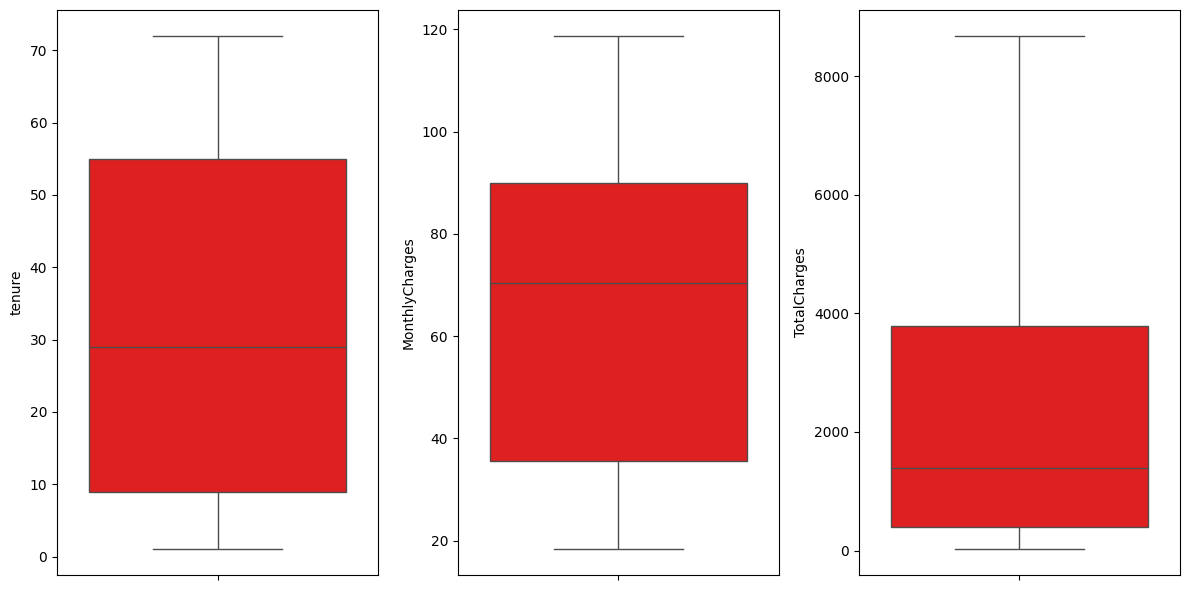

In [14]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = kontinu
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

tidak ada outlier pada fitur kontinu

KDE plot for knowing the distribution form

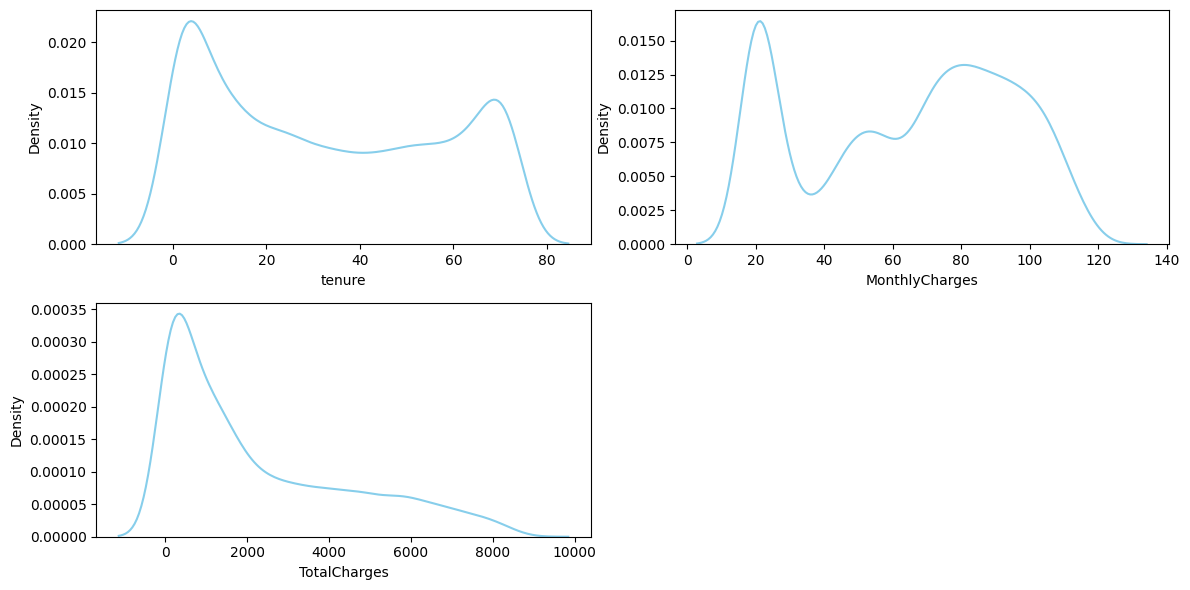

In [15]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = kontinu
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

1. Pada 'tenure' pelanggan terbagi 2 kelompok karena ada dua puncak distribusi yaitu ada yang baru 1 atau 2 bulan sudah churn, kemudian ada yang sudah lama (sekitar 70 bulan) baru memutuskan churn.
2. Pada monthly charges pelanggan telco terbagi 2 juga berdasarkan puncak distribusi, puncak pertama adalah 20, puncak kedua adalah 80. Ini menandakan pelanggan kebanyakan terbagi 2 dalam biaya berlangganan bulanan ada kelompok rendah dan kelompok tinggi.
3. Pada 'TotalCharges' puncak berada pada 400, menandakan bahwa banyak pelanggan yang memiliki total charges sekitar nilai itu. Distribusi data ini adalah distribusi skew kanan yang mana sebagian besar pelanggan memiliki total charges yang rendah.
4. Dari ketiga grafik bisa terlihat data sangat beragam karena lebar boxplot yang panjang

Barplot to check distribution categorical

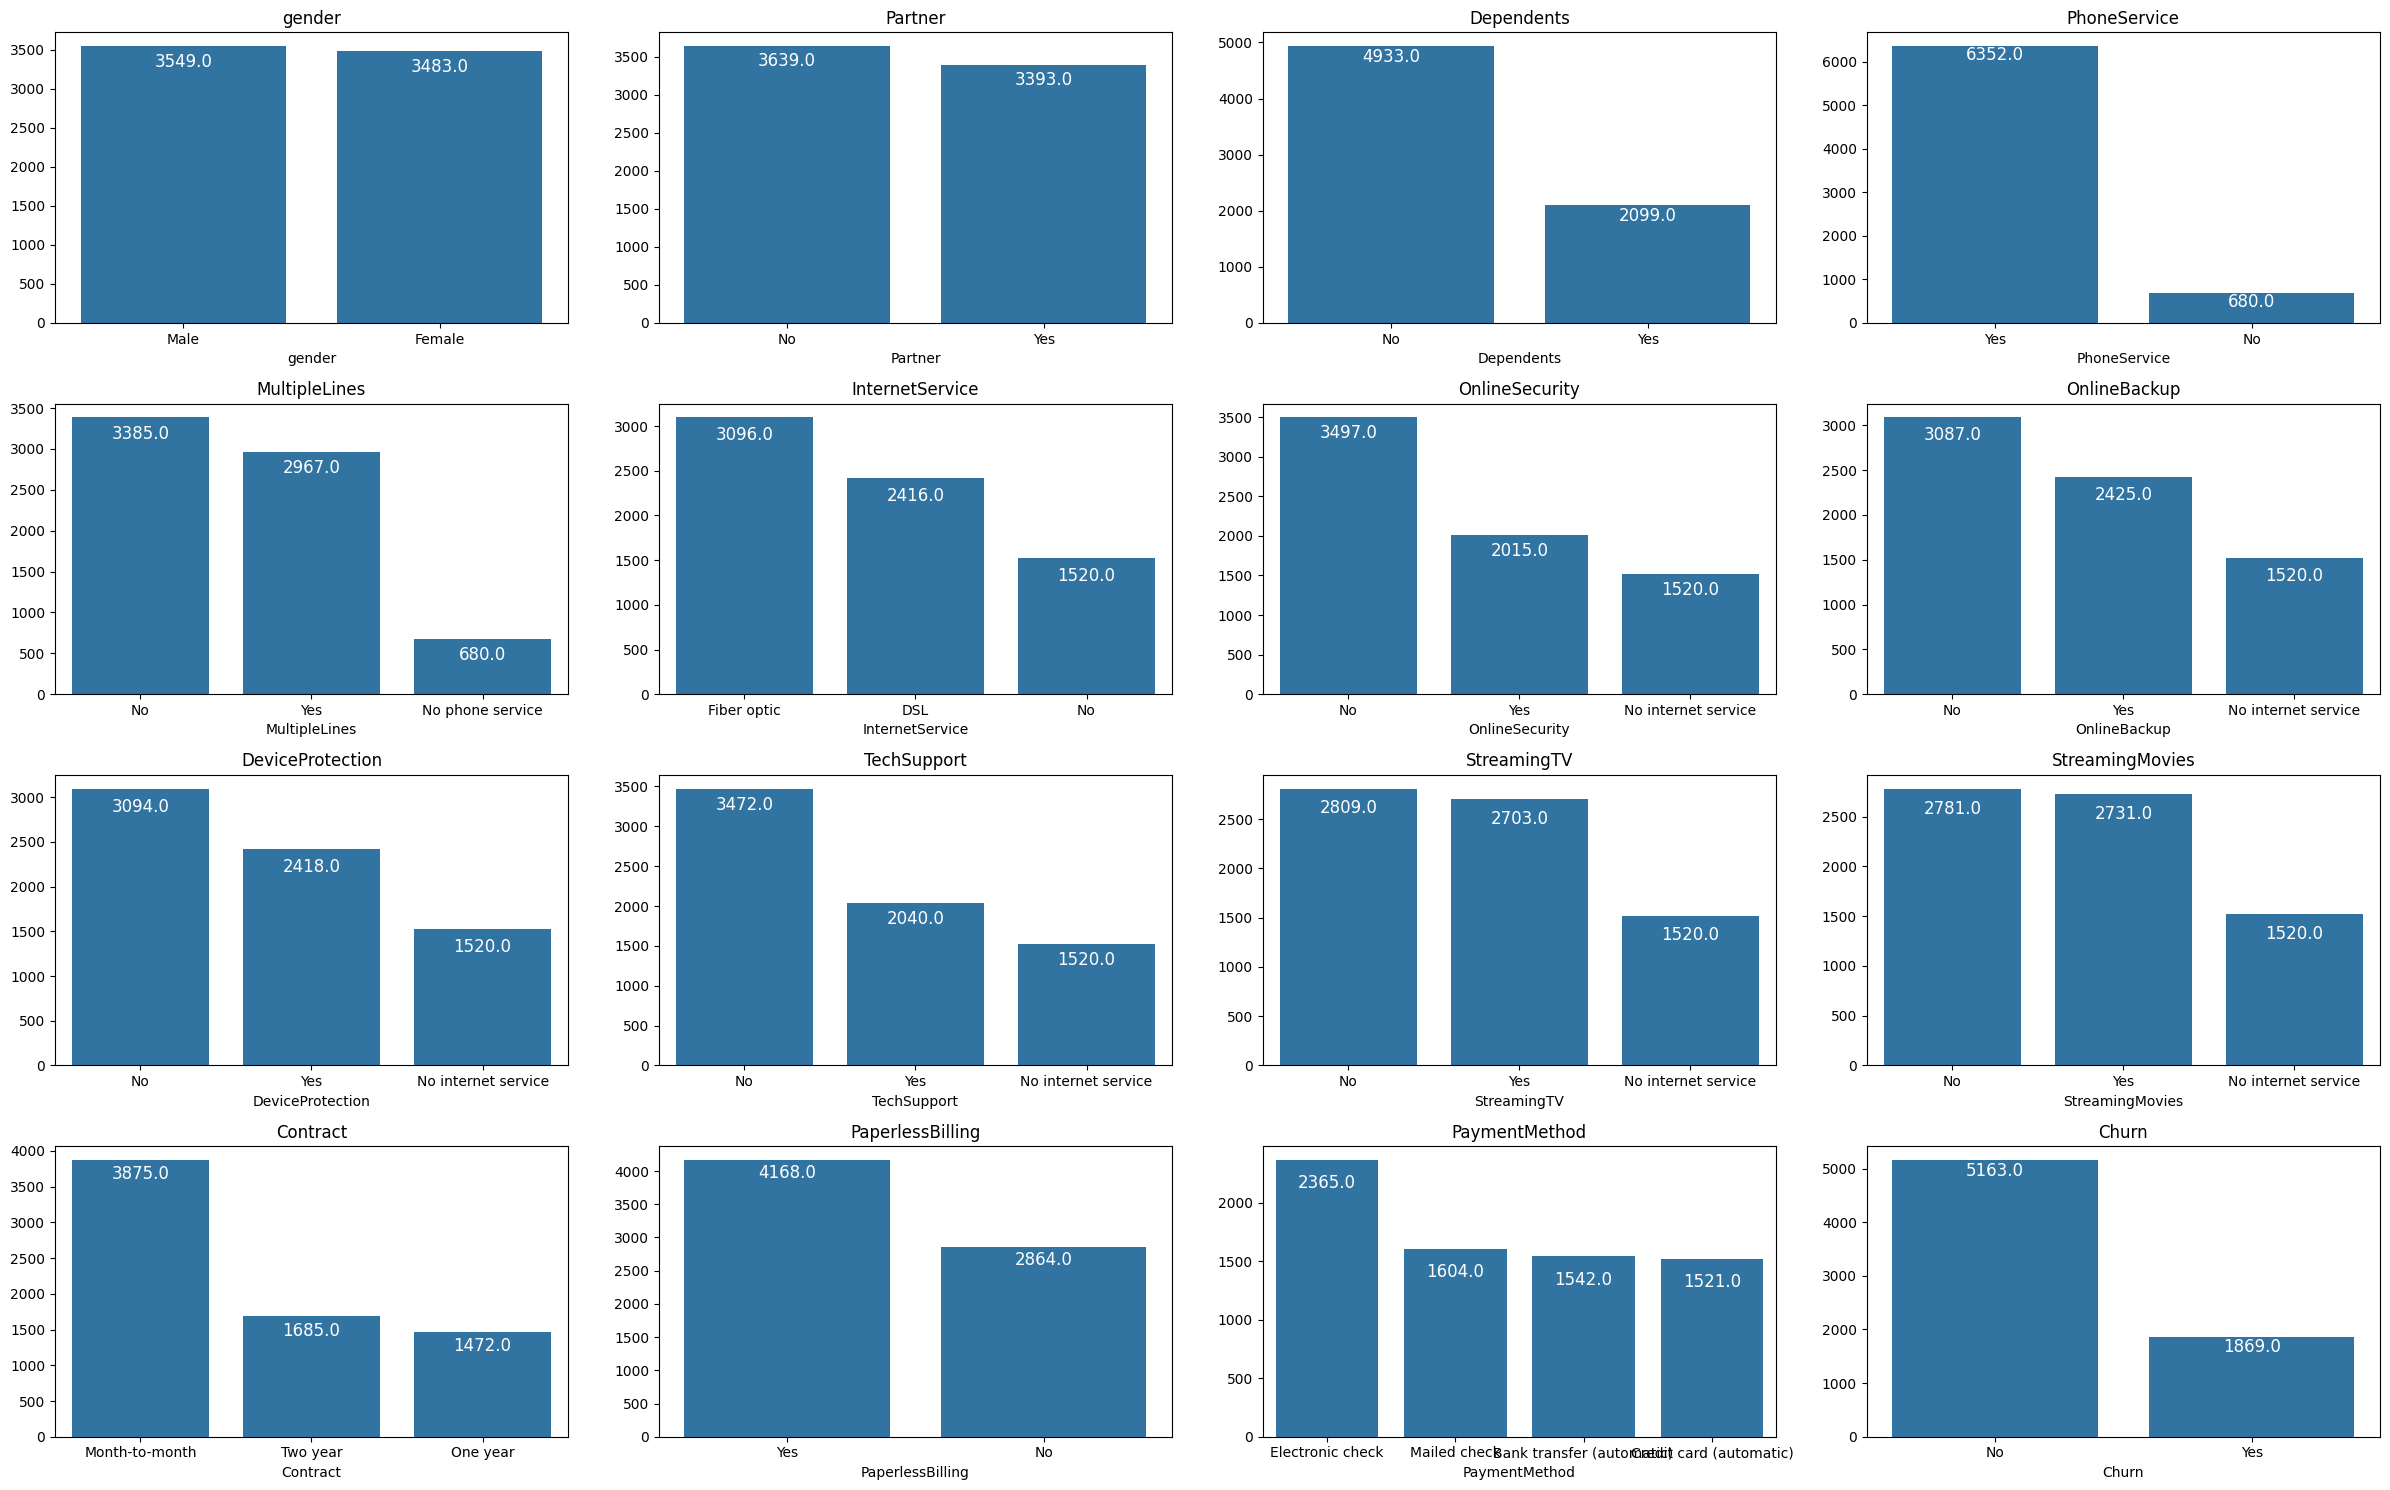

In [16]:
# plotting
jumlah_kategori = len(kategori)
baris = jumlah_kategori//4
kolom = 4

# Membuat subplot dengan ukuran baris x kolom
fig, axes = plt.subplots(baris, kolom, figsize=(24, 15))

# Loop melalui setiap kolom
for i, ax in enumerate(axes.flat):
    if i < jumlah_kategori:
        sns.barplot(x=df[kategori[i]].value_counts().index, y=df[kategori[i]].value_counts().values, ax=ax)
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height}', (x + width / 2, y + height - 200), ha='center', va='center', fontsize=12, color='white')
        ax.set_title(kategori[i])

plt.tight_layout()
plt.show()

1. Bisa dilihat bahwa fitur yang memiliki ketimpangan ekstrim adalah 'PhoneService'.
2. Fitur yang memiliki ketimpangan namun tidak ekstrim ada 'Churn', 'PaperSelling', 'Multiple Lines', 'Contract' dan 'Dependents

## Multivariate Analysis

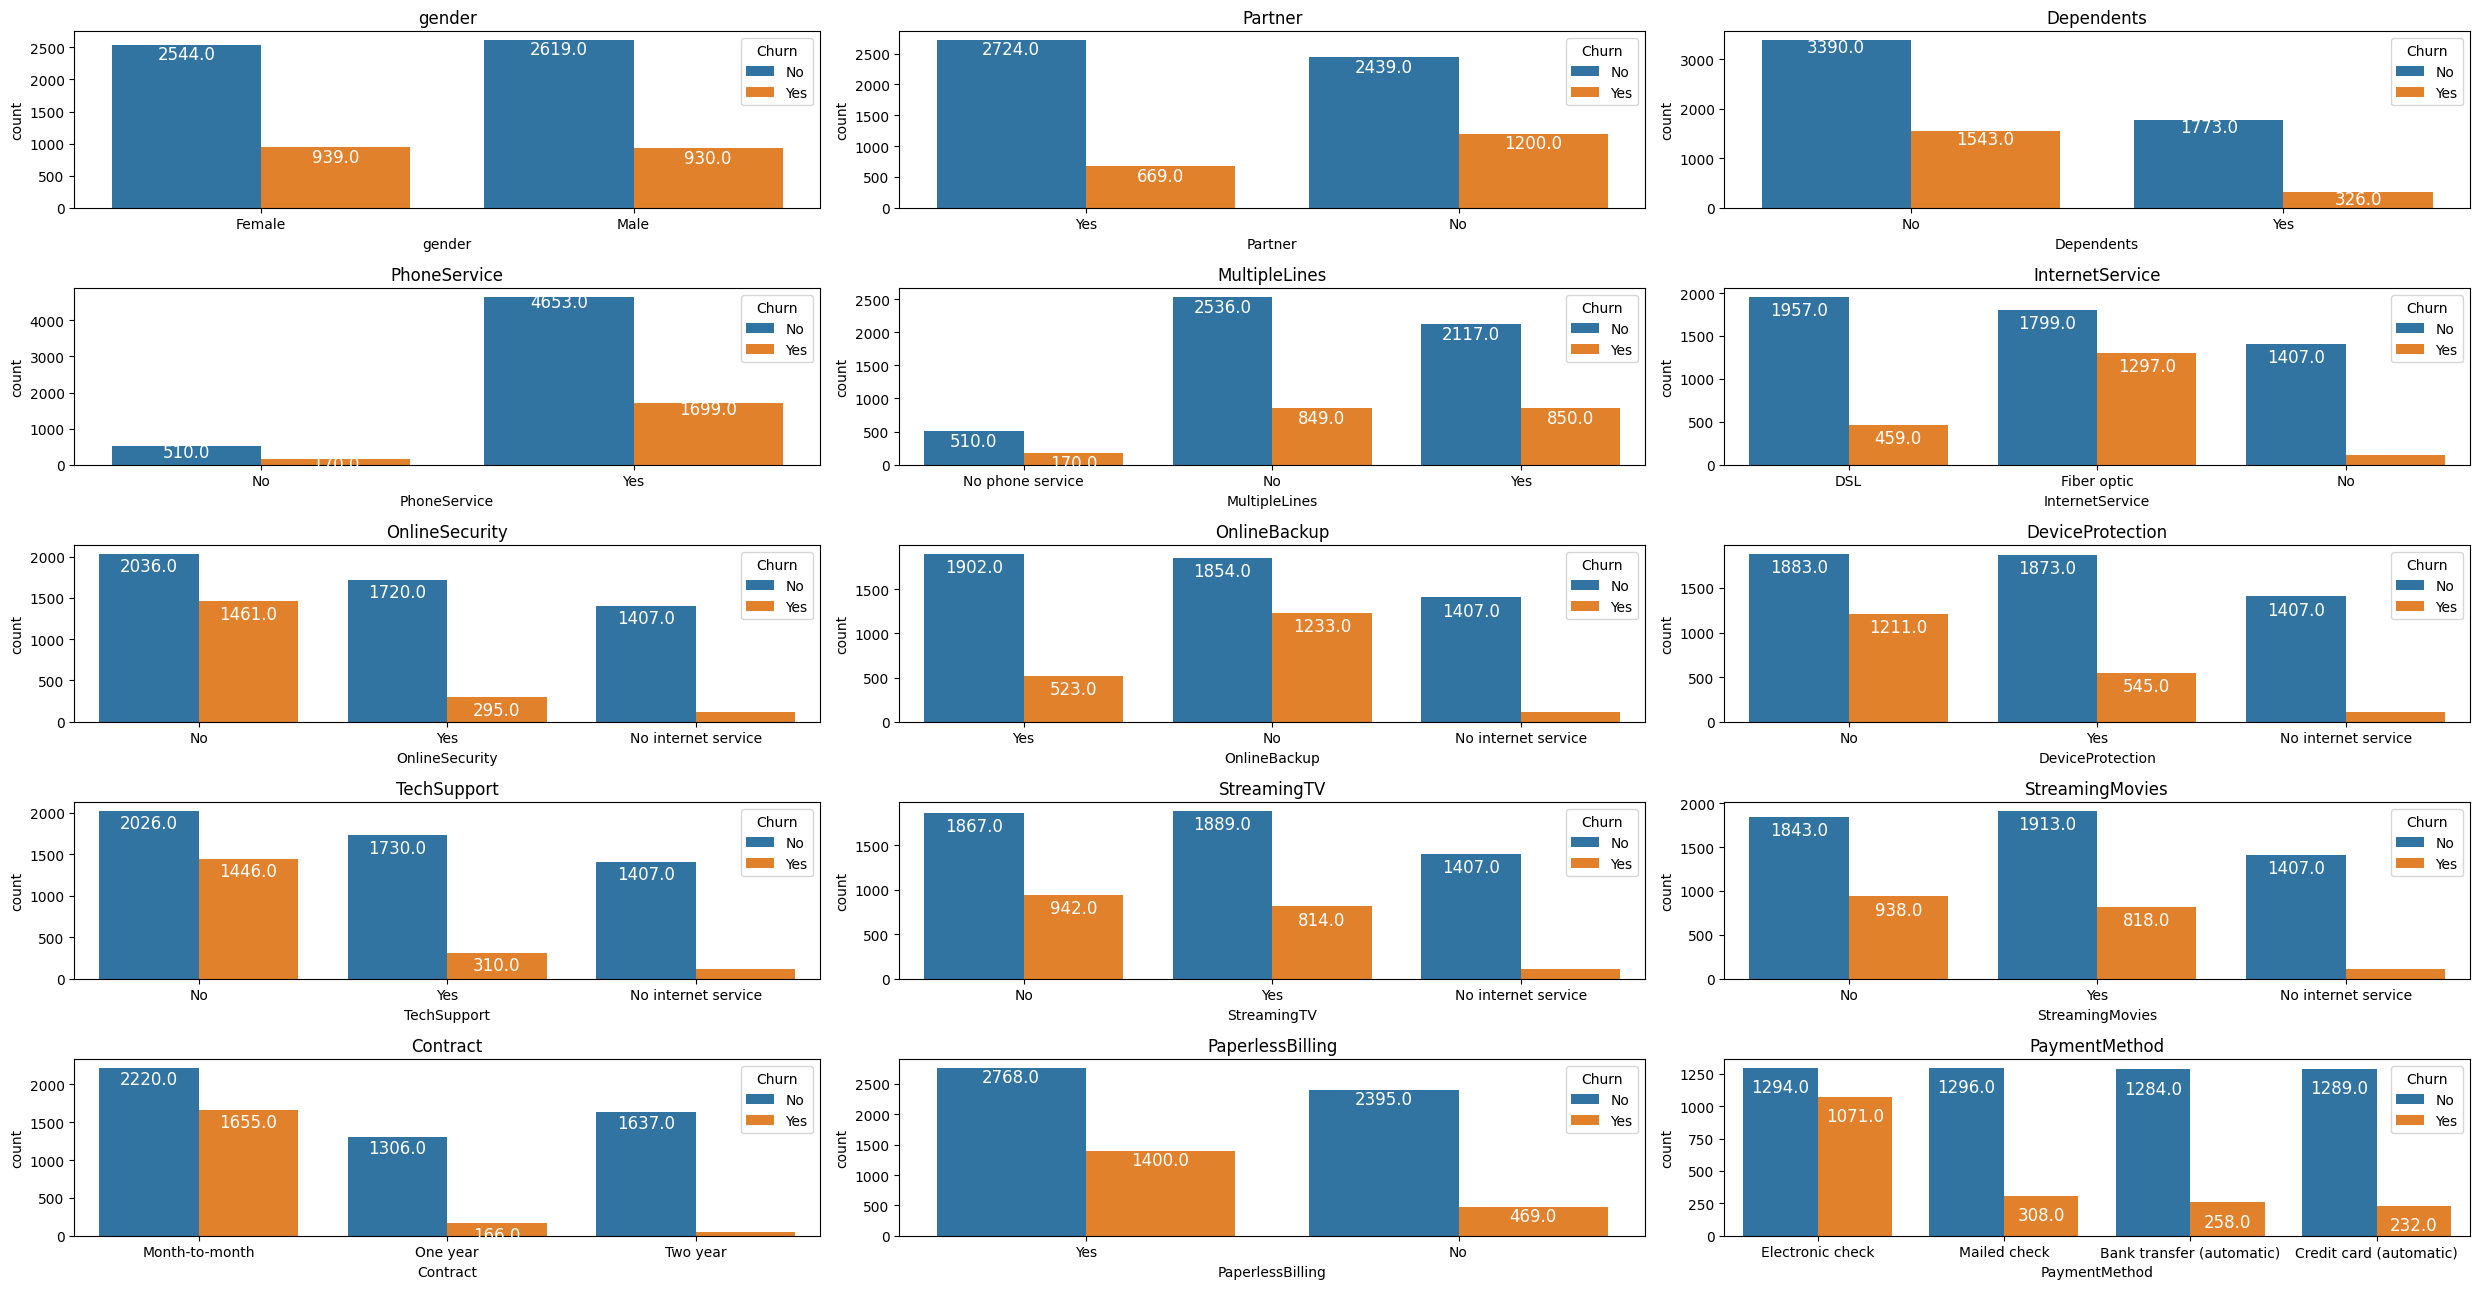

In [17]:
# plotting
kategori_tanpa_churn = kategori[:-1]
jumlah_kategori = len(kategori_tanpa_churn)
baris = jumlah_kategori // 3
kolom = 3

# Membuat subplot dengan ukuran baris x kolom
fig, axes = plt.subplots(baris, kolom, figsize=(25, 13))

# Loop melalui setiap kolom
for i, ax in enumerate(axes.flat):
    if i < jumlah_kategori:
        sns.countplot(x=kategori_tanpa_churn[i], hue='Churn', data=df, ax=ax)
        ax.set_title(kategori_tanpa_churn[i])
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width / 2, y + height - 150), ha='center', va='center', fontsize=12, color='white')

plt.tight_layout()
plt.show()

1. Pelanggan yang tidak mengambil layanan keamanan online (Online Security) dan layanan dukungan teknis (TechSupport) cenderung memiliki jumlah churn yang lebih tinggi.
2. Pelanggan yang tidak mengambil layanan backup online (Online Backup) dan layanan proteksi perangkat (Device Protection) juga memiliki jumlah churn yang lebih tinggi.
3. Pelanggan yang tidak memiliki tanggungan cenderung memiliki jumlah churn yang lebih tinggi dibandingkan dengan pelanggan yang memiliki tanggungan.
4. Pelanggan dengan layanan Fiber Optic memiliki jumlah churn yang lebih tinggi dibandingkan dengan pelanggan dengan layanan DSL.
5. Pelanggan dengan kontrak Month-to-Month memiliki jumlah churn yang jauh lebih tinggi dibandingkan dengan pelanggan dengan kontrak One Year.
6. Pelanggan dengan Paperless Billing (tagihan tanpa kertas) memiliki jumlah churn yang lebih tinggi dibandingkan dengan pelanggan yang tidak menggunakan Paperless Billing.
7. Pelanggan yang menggunakan Electronic Check sebagai metode pembayaran memiliki jumlah churn yang lebih tinggi dibandingkan dengan metode pembayaran lainnya.
8. Pelanggan yang tidak mempunyai partner cenderung untuk churn

### Kesimpulan umum dari chart diatas
- Terdapat beberapa faktor yang memengaruhi keputusan pelanggan untuk melakukan churn, seperti jenis layanan, keberadaan layanan keamanan, kontrak jangka panjang, model tagihan, dan metode pembayaran.
- Pelanggan yang tidak menggunakan layanan keamanan online atau layanan teknis, memiliki layanan Fiber Optic, memiliki kontrak Month-to-Month, menggunakan Paperless Billing, atau menggunakan Electronic Check cenderung memiliki jumlah churn yang lebih tinggi.

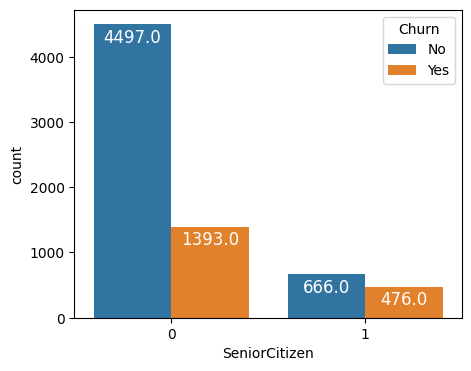

In [18]:
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.countplot(x=df['SeniorCitizen'], hue=df['Churn'])
for p in axes.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes.annotate(f'{height}', (x + width / 2, y + height - 200), ha='center', va='center', fontsize=12, color='white')
plt.show()

Masyarakat yang senior cenderung churn daripada yang tidak

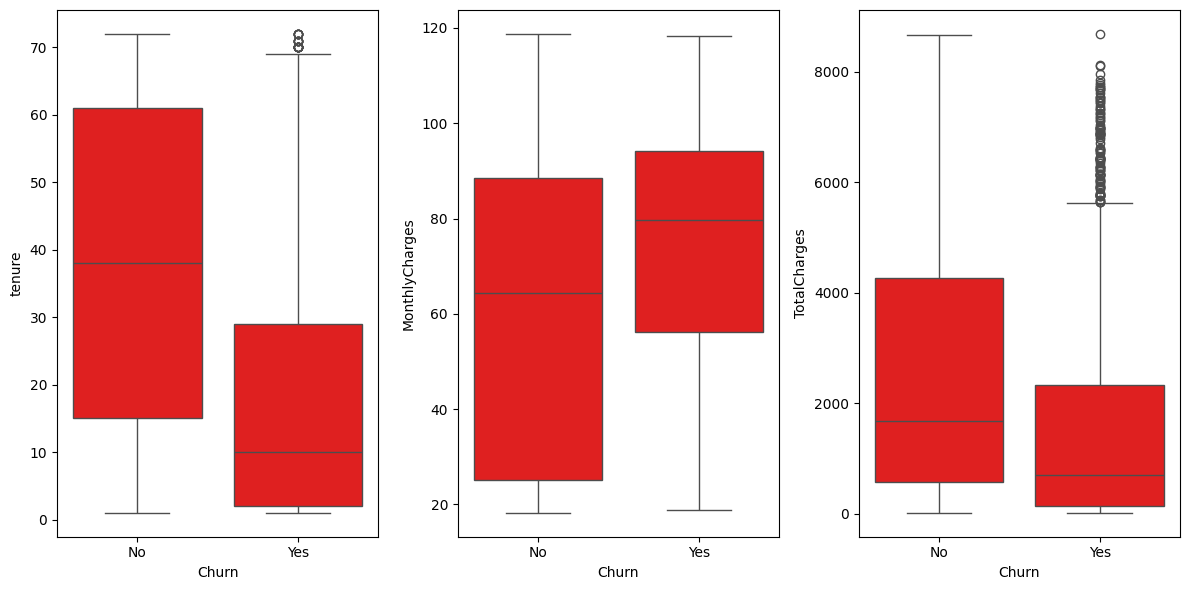

In [19]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = kontinu
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(x = df['Churn'], y=df[features[i]], color='red')
    plt.tight_layout()

1. Pelanggan yang churn cenderung memiliki masa langganan yang lebih pendek, biaya bulanan yang lebih tinggi, dan total tagihan yang lebih rendah.
2. Pelanggan yang tidak churn cenderung memiliki variasi yang lebih besar dalam tenure, MothlyCharges, dan TotalCharges.

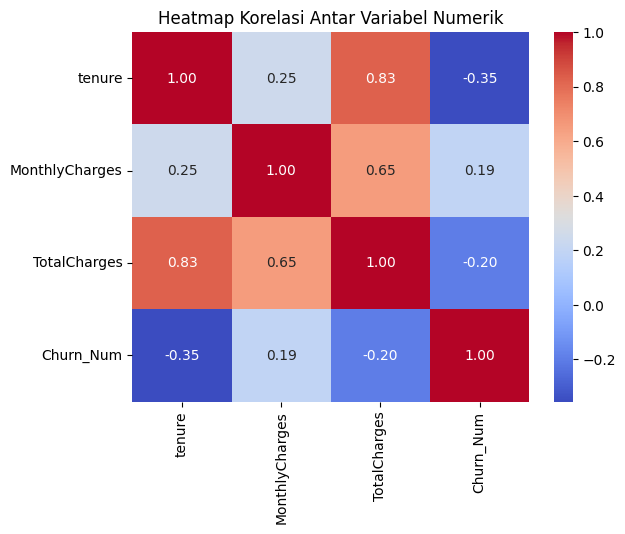

In [20]:
df['Churn_Num'] = np.where(df['Churn']=='Yes',1,0)

# Pilih variabel numerik
numeric_variables = df[['tenure', 'MonthlyCharges', 'TotalCharges','Churn_Num']]

# Hitung matriks korelasi
correlation_matrix = numeric_variables.corr()

# Buat heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik')
plt.show()

1. Korelasi antara Tenure dan TotalCharges adalah positif yang kuat (0.83) yang menandakan bahwa Semakin lama pelanggan berlangganan, semakin tinggi total tagihan yang mereka bayar. Ini masuk akal, karena masa langganan yang lebih panjang berarti lebih banyak pembayaran bulanan.
2. Korelasi antara MonthlyCharges dan TotalCharges adalah positif yang cukup kuat (0.65), menandakan bahwa Semakin tinggi biaya bulanan, semakin tinggi total tagihan. Ini sesuai dengan harapan, karena total tagihan secara langsung dipengaruhi oleh biaya bulanan yang dibebankan.

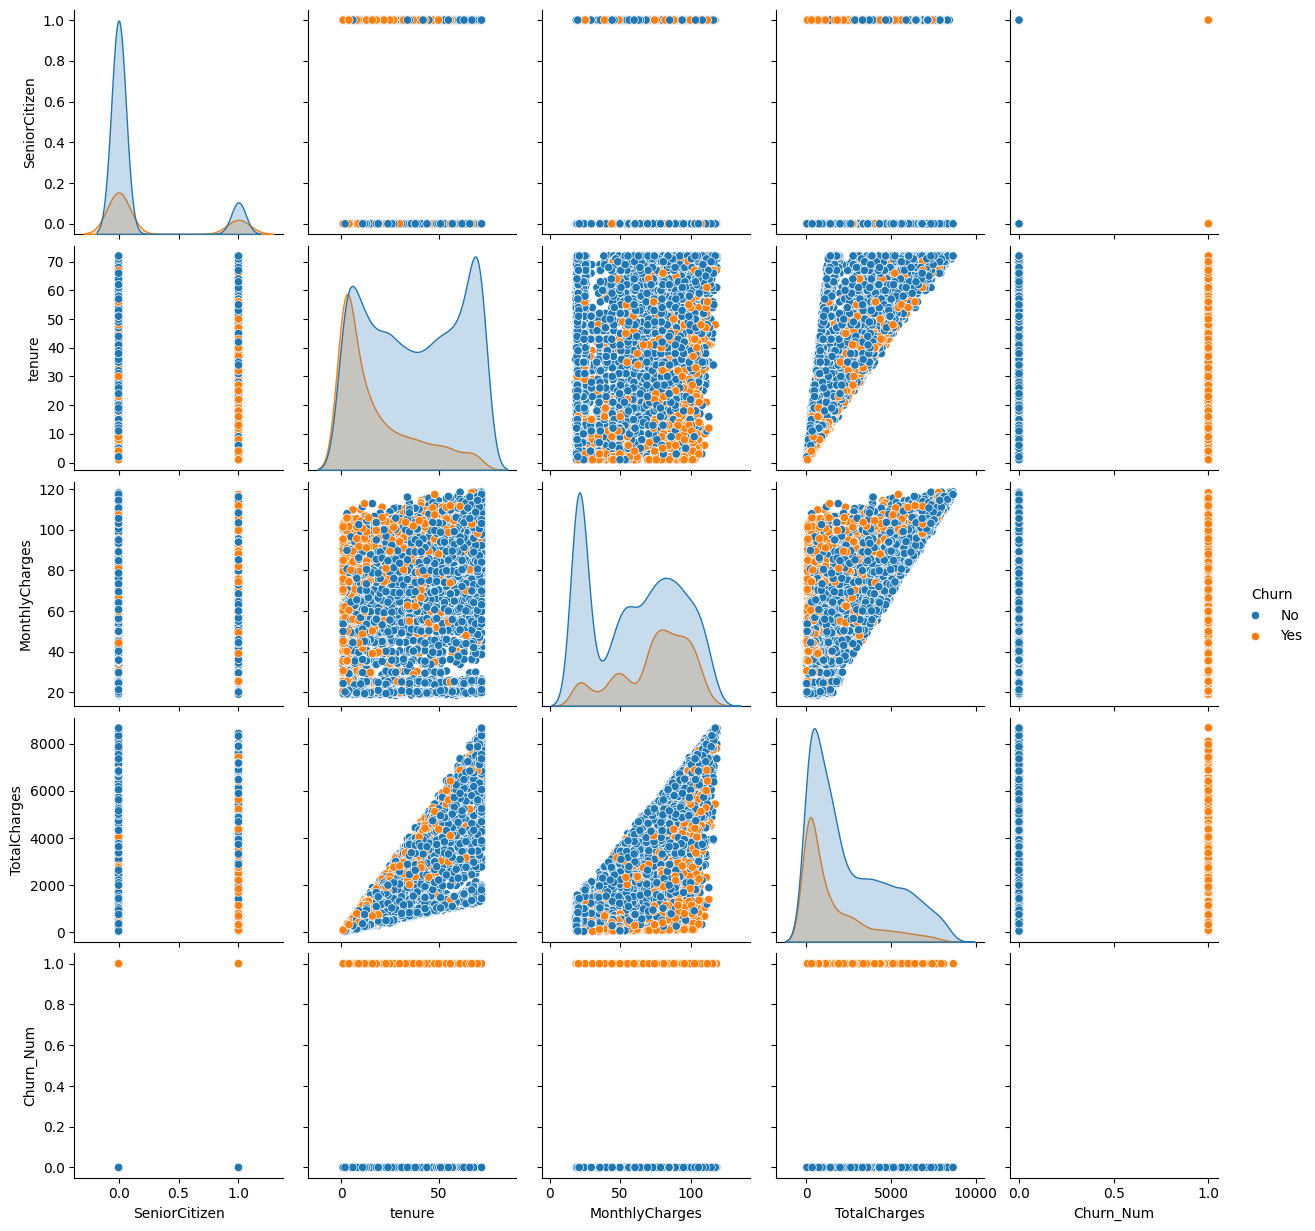

In [21]:
# pairplot of the data
sns.pairplot(df, hue='Churn')

1. Pelanggan yang tidak churn cenderung memiliki masa langganan yang lebih lama.

## Deep-dive Exploration

Questions:
1. Berapa perbandingan pelanggan churn dengan tidak churn yang mengambil layanan internet?
2. Berapa banyak pelanggan yang mengambil layanan internet dan tidak mengambil layanan OnlineSecurity, OnlineBackup, TechSupport, dan DeviceProtection sekaligus dibandingkan dengan layanan internet mengambil salah satu dari 4 layanan tersebut?
3. Apakah pelanggan yang tidak mengambil layanan OnlineSecurity, OnlineBackup, TechSupport, dan DeviceProtection sekaligus cenderung lebih banyak mengalami Churn dibandingkan yang mengambilnya? (khusus pelanggan yang mengambil internet service)
4. Berapa rata-rata dan median dari tenure, totalcharges, dan monthlycharges pelanggan churn yang mengambil layanan internet?

1. Berapa perbandingan pelanggan churn dengan tidak churn yang mengambil layanan internet?

In [40]:
df['InternetService_Check'] = np.where(df['InternetService']=='No','No', 'Yes')
df['InternetService_Check'].value_counts()

InternetService_Check
Yes    5512
No     1520
Name: count, dtype: int64

In [42]:
df_internet_service = df[df['InternetService_Check']=='Yes']
df_internet_service.groupby(['Churn']).size().reset_index(name='Count')

,Churn,Count
0,No,3756
1,Yes,1756


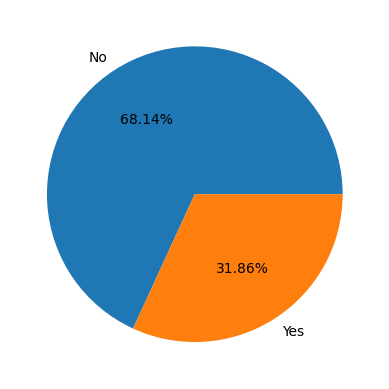

In [47]:
data_pie = df_internet_service.groupby(['Churn']).size().reset_index(name='Count')

plt.pie(data_pie["Count"], labels=data_pie["Churn"], autopct='%.2f%%')
plt.show()

Perbandingan pelanggan yang churn dengan tidak churn yang mengambil layanan internet adalah:
Churn sebanyak 31.86%, tidak churn sebanyak 68.14%

2. Berapa banyak pelanggan yang mengambil layanan internet dan tidak mengambil layanan OnlineSecurity, OnlineBackup, TechSupport, dan DeviceProtection sekaligus dibandingkan dengan layanan internet mengambil salah satu dari 4 layanan tersebut?

In [55]:
condition_1 = df['OnlineSecurity'] == 'No'
condition_2 = df['OnlineBackup'] == 'No'
condition_3 = df['TechSupport'] == 'No'
condition_4 = df['DeviceProtection'] == 'No'

df['Keamanan_Teknis'] = np.where((condition_1) & (condition_2) & (condition_3) & (condition_4), 'No', 'Yes')
df['Keamanan_Teknis'].head(5)

0    Yes
1    Yes
2    Yes
3    Yes
4     No
Name: Keamanan_Teknis, dtype: object

In [56]:
df_internet_service = df[df['InternetService_Check']=='Yes']
df_internet_service.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Num,InternetService_Check,Keamanan_Teknis
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,Yes,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,0,Yes,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Yes,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,Yes,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Yes,No


In [58]:
df_internet_service['Keamanan_Teknis'].value_counts()

Keamanan_Teknis
Yes    4245
No     1267
Name: count, dtype: int64

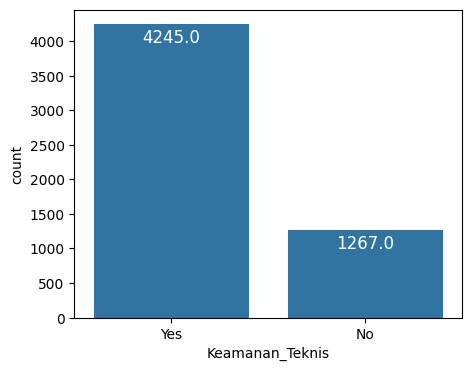

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.countplot(data=df_internet_service,x='Keamanan_Teknis')
for p in axes.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes.annotate(f'{height}', (x + width / 2, y + height - 200), ha='center', va='center', fontsize=12, color='white')
plt.show()

3. Apakah pelanggan yang tidak mengambil layanan OnlineSecurity, OnlineBackup, TechSupport, dan DeviceProtection sekaligus cenderung lebih banyak mengalami Churn dibandingkan yang mengambilnya? (khusus pelanggan yang mengambil internet service)

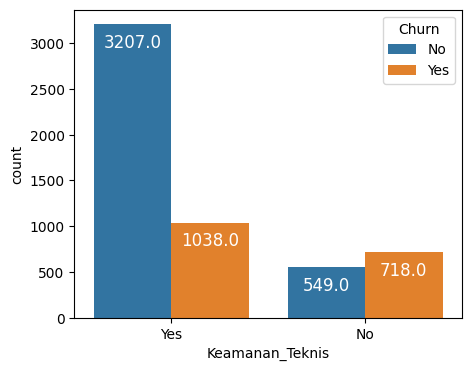

In [61]:
fig, axes = plt.subplots(1, 1, figsize=(5, 4))
sns.countplot(data=df_internet_service,x='Keamanan_Teknis', hue='Churn')
for p in axes.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes.annotate(f'{height}', (x + width / 2, y + height - 200), ha='center', va='center', fontsize=12, color='white')
plt.show()

Pelanggan yang tidak mengambil layanan OnlineSecurity, OnlineBackup, TechSupport, dan DeviceProtection sekaligus cenderung lebih banyak churn dari pada tidak mengambil salah satu dari layanan tersebut.

4. Berapa rata-rata dan median dari tenure, totalcharges, dan monthlycharges pelanggan churn yang mengambil layanan internet?

In [97]:
df_internet_service.groupby(['Churn']).agg(
    mean_tenure = ('tenure','mean'),
    median_tenure = ('tenure', 'median'),
    mean_totalcharges = ('TotalCharges', 'mean'),
    median_totalcharges = ('TotalCharges', 'median'),
    mean_monthlycharges = ('MonthlyCharges', 'mean'),
    median_monthlycharges = ('MonthlyCharges', 'median')
).reset_index()

,Churn,mean_tenure,median_tenure,mean_totalcharges,median_totalcharges,mean_monthlycharges,median_monthlycharges
0,No,39.590788,41.0,3248.604859,2938.725,76.356709,78.725
1,Yes,18.605923,10.0,1619.176509,814.675,77.920985,80.450


Terlihat bahwa rata-rata dan median tenure serta total charges dari pelanggan yang melakukan churn lebih rendah dibandingkan dengan pelanggan yang tidak churn. Namun, dari segi monthly charges, pelanggan churn dan tidak churn memiliki biaya bulanan (monthly charges) yang relatif sama, hal ini terlihat dari nilai rata-rata dan median yang hampir sebanding.

Pelanggan yang melakukan churn memiliki kecenderungan untuk memiliki masa langganan (tenure) dan total biaya (total charges) yang lebih rendah.
Meskipun biaya bulanan (monthly charges) pelanggan churn dan tidak churn relatif serupa, ini bisa menandakan bahwa biaya bulanan tidak menjadi faktor utama dalam keputusan pelanggan untuk melakukan churn.